In [1]:
# SimpleRNN 구현

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/AI/equip11.csv')
df.head()

,regdate,temp1,temp2,temp3,temp4,temp5,temp6
0,2019-04-10 8:00,19.5,-81.4,-9.7,32.4,50.4,34.4
1,2019-04-10 8:01,20.8,-81.0,-5.1,32.3,51.6,34.2
2,2019-04-10 8:02,21.5,-80.6,-1.6,32.2,52.6,33.9
3,2019-04-10 8:08,33.0,-78.9,-20.8,33.7,51.5,36.9
4,2019-04-10 8:09,33.8,-78.6,-25.1,33.6,48.9,35.2


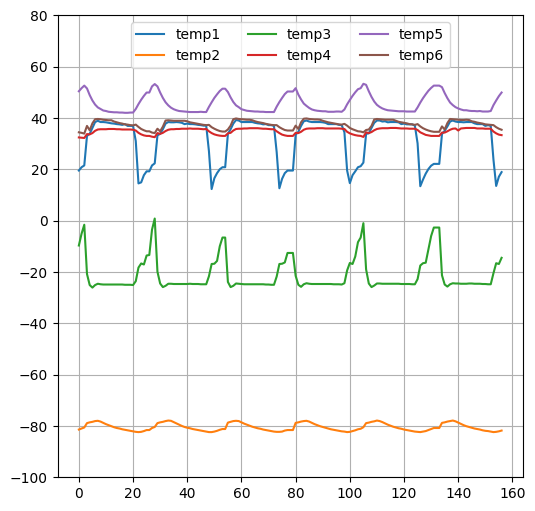

In [3]:
plt.figure(figsize=(6,6))

plt.plot(df['temp1'], label='temp1')
plt.plot(df['temp2'], label='temp2')
plt.plot(df['temp3'], label='temp3')
plt.plot(df['temp4'], label='temp4')
plt.plot(df['temp5'], label='temp5')
plt.plot(df['temp6'], label='temp6')
plt.grid()
plt.legend(loc=9, ncol=3)
plt.ylim([-100,80])
plt.show()

그래프와 같은 패턴의 움직임이면 이상 없음..  
다른 패턴이 나온다면 이상 감지 !

In [4]:
# 문자열을 날짜 형식으로 변환
df['regdate'] = pd.to_datetime(df.regdate, format='%Y-%m-%d %H:%M')
df.head()

,regdate,temp1,temp2,temp3,temp4,temp5,temp6
0,2019-04-10 08:00:00,19.5,-81.4,-9.7,32.4,50.4,34.4
1,2019-04-10 08:01:00,20.8,-81.0,-5.1,32.3,51.6,34.2
2,2019-04-10 08:02:00,21.5,-80.6,-1.6,32.2,52.6,33.9
3,2019-04-10 08:08:00,33.0,-78.9,-20.8,33.7,51.5,36.9
4,2019-04-10 08:09:00,33.8,-78.6,-25.1,33.6,48.9,35.2


In [5]:
# index를 설정하면 유일성 보장(중복x)
df.index = df['regdate'] # 날짜를 인덱스로 설정

data = df.sort_index(ascending=True, axis = 0)  # 행단위 오름차순 정렬

In [6]:
new_data = data[['temp1']]
final_data = new_data.values   # array 타입으로 변환
print(final_data)

[[19.5]
 [20.8]
 [21.5]
 [33. ]
 [33.8]
 [36.1]
 [38.4]
 [38.9]
 [38.4]
 [38.4]
 [38.3]
 [38.1]
 [37.9]
 [37.8]
 [37.6]
 [37.5]
 [37.3]
 [37.6]
 [36.9]
 [36.9]
 [36.9]
 [31. ]
 [14.5]
 [14.9]
 [17.7]
 [19.2]
 [19.2]
 [21.5]
 [22.3]
 [33.2]
 [33.8]
 [35.6]
 [37.8]
 [38.4]
 [38.3]
 [38.3]
 [38.4]
 [38.3]
 [38.1]
 [37.6]
 [37.8]
 [37.6]
 [37.6]
 [37.5]
 [37.3]
 [37.2]
 [37. ]
 [37. ]
 [27.1]
 [12.3]
 [16.5]
 [18.5]
 [20. ]
 [20.8]
 [20.8]
 [33.8]
 [35.6]
 [37.8]
 [39.2]
 [39. ]
 [38.4]
 [38.4]
 [38.4]
 [38.4]
 [38.4]
 [38.1]
 [37.9]
 [37.8]
 [37.5]
 [37.6]
 [37.2]
 [37.2]
 [36.9]
 [26.7]
 [12.6]
 [16.3]
 [18.5]
 [19.5]
 [19.5]
 [19.5]
 [33.5]
 [34.6]
 [36.9]
 [38.7]
 [39. ]
 [38.6]
 [38.4]
 [38.4]
 [38.4]
 [38.4]
 [38.3]
 [38.1]
 [37.6]
 [37.6]
 [37.6]
 [37.6]
 [37.3]
 [37.2]
 [34.4]
 [19.5]
 [14.6]
 [17.7]
 [19.2]
 [20.8]
 [21.2]
 [22.6]
 [33.8]
 [34. ]
 [36.1]
 [38.1]
 [39. ]
 [39. ]
 [38.6]
 [38.7]
 [38.3]
 [38.4]
 [38.4]
 [38.4]
 [38.3]
 [37.6]
 [37.8]
 [37.5]
 [37.5]
 [37.5]
 [37. ]


In [7]:
final_data.shape

(157, 1)

In [8]:
# 데이터셋 분리
train_data = final_data[0:120, :]
test_data = final_data[120:, :]

# 스케일러 객체 생성 (정규화)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_data)  # 정규화 실행

scaled_data[:20]  # 정규화 확인 (0~1 사이)

array([[0.26765799],
       [0.31598513],
       [0.34200743],
       [0.76951673],
       [0.79925651],
       [0.88475836],
       [0.97026022],
       [0.98884758],
       [0.97026022],
       [0.97026022],
       [0.96654275],
       [0.95910781],
       [0.95167286],
       [0.94795539],
       [0.94052045],
       [0.93680297],
       [0.92936803],
       [0.94052045],
       [0.91449814],
       [0.91449814]])

In [9]:
# 학습데이터, 정답데이터 구성
x_train, y_train = [], []  # 리스트 초기화
for i in range(10, len(train_data)) :
    x_train.append(scaled_data[i-10:i, 0])
    y_train.append(scaled_data[i, 0])

In [10]:
# numpy 배열로 변환
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# SimpleRNN 에 입력하기 위해 훈련데이터를 3차원으로 변환
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
# 3차원 확인
x_train.shape

(110, 10, 1)

In [13]:
# SimpleRNN 설계
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True,
                              input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.SimpleRNN(units=10),
    tf.keras.layers.Dense(1)         # 출력
])
rnn_model.compile(loss='mse', optimizer='adam')
rnn_model.summary()

NotImplementedError: Cannot convert a symbolic Tensor (simple_rnn/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
history_rnn = rnn_model.fit(x_train, y_train, epochs=20, batch_size=1,
                            validation_split=0.2, verbose=1)

In [ ]:
plt.plot(history_rnn.history['loss'], 'b--', label='loss')
plt.plot(history_rnn.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터셋으로 검증 및 시각화
input_data = new_data[len(new_data) - len(test_data) - 10 : ].values
input_data = input_data.reshape(-1, 1)   # 차원 늘리기
input_data = scaler.transform(input_data)

In [ ]:
print(input_data.shape[0])

In [ ]:
# 검증 데이터셋
x_test = []
for i in range(10, input_data.shape[0]):
    x_test.append(input_data[i-10:i, 0])

In [ ]:
# numpy 배열로 변환
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# 예측
pred_temp1 = rnn_model.predict(x_test)
pred_temp1 = scaler.inverse_transform(pred_temp1)   # 정규화 역변환

In [ ]:
train_data = new_data[:120]
valid_data = new_data[120:]
valid_data['pred'] = pred_temp1  # 예측결과 값을 새로운 열로 추가

In [ ]:
valid_data

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(train_data['temp1'], label='train')
plt.plot(valid_data['temp1'], label='valid')
plt.plot(valid_data['pred'], label='pred')
plt.legend(loc = 9, ncol=3)
plt.show()